## ADSP 32021 - MLops
Shawn Trewartha  
Assignment 2


In [4]:
!pip install feast==0.40.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.4/5.4 MB 37.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.3/103.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.7/517.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 106.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 81.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 456.8/456.8 kB 36.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Succes

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/mlops/athletes.csv')

Set up the Feature Store repository using FEAST

In [3]:
import feast
!feast init my_feature_repo

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)



Creating a new Feast repository in /content/my_feature_repo.



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423006 entries, 0 to 423005
Data columns (total 27 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   athlete_id  423003 non-null  float64
 1   name        331110 non-null  object 
 2   region      251262 non-null  object 
 3   team        155160 non-null  object 
 4   affiliate   241916 non-null  object 
 5   gender      331110 non-null  object 
 6   age         331110 non-null  float64
 7   height      159869 non-null  float64
 8   weight      229890 non-null  float64
 9   fran        55426 non-null   float64
 10  helen       30279 non-null   float64
 11  grace       40745 non-null   float64
 12  filthy50    19359 non-null   float64
 13  fgonebad    29738 non-null   float64
 14  run400      22246 non-null   float64
 15  run5k       36097 non-null   float64
 16  candj       104435 non-null  float64
 17  snatch      97280 non-null   float64
 18  deadlift    115323 non-null  float64
 19  ba

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Clean data

In [9]:
def clean_data(data):
  # Remove not relevant columns
    data = data.dropna(subset=['region','age','weight','height','howlong','gender','eat', \
                               'train','background','experience','schedule','howlong', \
                               'deadlift','candj','snatch','backsq','experience',\
                               'background','schedule','howlong'])
    data = data.drop(columns=['affiliate','team','name','fran','helen','grace',\
                              'filthy50','fgonebad','run400','run5k','pullups','train'])

    # Remove Outliers

    data = data[data['weight'] < 1500]
    data = data[data['gender'] != '--']
    data = data[data['age'] >= 18]
    data = data[(data['height'] < 96) & (data['height'] > 48)]

    data = data[(data['deadlift'] > 0) & (v2['deadlift'] <= 1105)|((data['gender'] == 'Female') \
                 & (data['deadlift'] <= 636))]
    data = data[(data['candj'] > 0) & (data['candj'] <= 395)]
    data = data[(data['snatch'] > 0) & (data['snatch'] <= 496)]
    data = data[(data['backsq'] > 0) & (data['backsq'] <= 1069)]

    # Clean Survey Data

    decline_dict = {'Decline to answer|': np.nan}
    data = data.replace(decline_dict)
    data = data.dropna(subset=['background','experience','schedule','howlong','eat'])

    return data

In [10]:
v2 = df

v2 = clean_data(df)
v2

/tmp/ipython-input-2861520785.py:17: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  data = data[(data['deadlift'] > 0) & (v2['deadlift'] <= 1105)|((data['gender'] == 'Female') \
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


,athlete_id,region,gender,age,height,weight,candj,snatch,deadlift,backsq,eat,background,experience,schedule,howlong
21,21269.0,Southern California,Male,30.0,71.0,200.0,235.0,175.0,385.0,315.0,I eat whatever is convenient|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 1x a week|I ty...,1-2 years|
22,21685.0,Africa,Male,28.0,70.0,176.0,187.0,134.0,335.0,254.0,I eat 1-3 full cheat meals per week|,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 1x a week|,2-4 years|
27,25464.0,North East,Male,35.0,68.0,225.0,285.0,205.0,440.0,405.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,2-4 years|
50,43767.0,North Central,Male,36.0,71.0,199.0,267.0,212.0,485.0,390.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I do multiple workouts in a day 3+ times a wee...,1-2 years|
60,55504.0,North East,Male,36.0,64.0,155.0,245.0,180.0,415.0,385.0,I eat strict Paleo|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I do multiple workouts in a day 2x a week|I st...,4+ years|
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422877,567689.0,South West,Male,25.0,70.0,163.0,175.0,135.0,240.0,220.0,I eat quality foods but don't measure the amou...,I have no athletic background besides CrossFit|,I began CrossFit with a coach (e.g. at an affi...,I typically rest fewer than 4 days per month|,1-2 years|
422881,579828.0,Australia,Male,24.0,70.0,174.0,143.0,121.0,351.0,287.0,I eat 1-3 full cheat meals per week|,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I typically rest 4 or more days per month|,6-12 months|
422915,447916.0,Latin America,Female,25.0,64.0,126.0,110.0,88.0,243.0,176.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|I p...,I began CrossFit by trying it alone (without a...,I usually only do 1 workout a day|I typically ...,Less than 6 months|
422923,486124.0,North Central,Female,22.0,72.0,174.0,115.0,95.0,175.0,115.0,I eat quality foods but don't measure the amount|,I played youth or high school level sports|I p...,I began CrossFit with a coach (e.g. at an affi...,I usually only do 1 workout a day|I typically ...,Less than 6 months|


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [11]:
v2.columns

Index(['athlete_id', 'region', 'gender', 'age', 'height', 'weight', 'candj',
       'snatch', 'deadlift', 'backsq', 'eat', 'background', 'experience',
       'schedule', 'howlong'],
      dtype='object')

Save the two verions of the features as v2 and v3

In [12]:
import pandas as pd
from datetime import datetime, timedelta
import os

base_time = datetime(2023, 1, 1)
v2["event_timestamp"] = [base_time + timedelta(seconds=i) for i in range(len(v2))]

os.makedirs("/content/my_feature_repo/feature_repo/data", exist_ok=True)
v2.to_parquet("/content/my_feature_repo/feature_repo/data/athletes_v1.parquet", index=False)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [14]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
import numpy as np

v3 = v2.copy()

# Standardize numeric features
scaler = StandardScaler()
numeric_cols = ["age", "height", "weight", "candj", "snatch", "deadlift", "backsq"]
v3[numeric_cols] = scaler.fit_transform(v3[numeric_cols])

# Encode gender (as an example categorical encoding)
le = LabelEncoder()
v3["gender"] = le.fit_transform(v3["gender"].astype(str))

# Save as athletes_v2.parquet
v3.to_parquet("/content/my_feature_repo/feature_repo/data/athletes_v2.parquet", index=False)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Build MLPipeline

In [18]:
v2['total_lift'] = v2[['candj', 'snatch', 'deadlift', 'backsq']].sum(axis=1)
v3['total_lift'] = v3[['candj', 'snatch', 'deadlift', 'backsq']].sum(axis=1)

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [20]:
categorical_cols = ['region', 'gender', 'eat', 'howlong']
numeric_cols = ['candj', 'snatch', 'deadlift', 'backsq']

X_v2 = v2[categorical_cols + numeric_cols]
y_v2 = v2['total_lift']

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [21]:
from sklearn.model_selection import train_test_split

X_train_v2, X_test_v2, y_train_v2, y_test_v2 = train_test_split(
    X_v2, y_v2, test_size=0.2, random_state=123
)

In [22]:
pipeline.fit(X_train_v2, y_train_v2)  # ⚠ This is mandatory
y_pred_v2 = pipeline.predict(X_test_v2)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [23]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_v2, y_pred_v2)
r2 = r2_score(y_test_v2, y_pred_v2)

print("V2 - MSE:", mse, "R2:", r2)

V2 - MSE: 4.0816964895180444e-07 R2: 0.9999999999947328


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Fir the linear regression pipline to the 2 stored features

In [25]:

import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


for df in [v2, v3]:
    df['total_lift'] = df[['candj', 'snatch', 'deadlift', 'backsq']].sum(axis=1)


categorical_cols = ['region', 'gender', 'eat', 'howlong']
numeric_cols = ['candj', 'snatch', 'deadlift', 'backsq']


preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), categorical_cols),
        ('num', 'passthrough', numeric_cols)
    ]
)

# Pipeline
pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('model', LinearRegression())
])


X = v2[categorical_cols + numeric_cols]
y = v2['total_lift']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123
)


pipeline.fit(X_train, y_train)


y_pred = pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("V2 - MSE:", mse)
print("V2 - R2:", r2)


V2 - MSE: 4.0816964895180444e-07
V2 - R2: 0.9999999999947328


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [26]:

v3['total_lift'] = v3[['candj', 'snatch', 'deadlift', 'backsq']].sum(axis=1)


X_v3 = v3[categorical_cols + numeric_cols]
y_v3 = v3['total_lift']


X_train_v3, X_test_v3, y_train_v3, y_test_v3 = train_test_split(
    X_v3, y_v3, test_size=0.2, random_state=123
)


pipeline.fit(X_train_v3, y_train_v3)


y_pred_v3 = pipeline.predict(X_test_v3)


mse_v3 = mean_squared_error(y_test_v3, y_pred_v3)
r2_v3 = r2_score(y_test_v3, y_pred_v3)

print("V3 - MSE:", mse_v3)
print("V3 - R2:", r2_v3)

V3 - MSE: 9.479165495000817e-11
V3 - R2: 0.9999999999935982


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Run the model with 2 differnt versions and 2 differnt hyper parameters

In [28]:
hyperparams = [
    {'fit_intercept': True},
    {'fit_intercept': False}
]

feature_versions = {
    'v2': v2,
    'v3': v3
}

In [29]:
# Hyperparameter set 1
pipeline.set_params(model__fit_intercept=True)
pipeline.fit(X_train_v2, y_train_v2)
y_pred_v2_1 = pipeline.predict(X_test_v2)

# Hyperparameter set 2
pipeline.set_params(model__fit_intercept=False)
pipeline.fit(X_train_v2, y_train_v2)
y_pred_v2_2 = pipeline.predict(X_test_v2)




/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC

In [30]:
pipeline.set_params(model__fit_intercept=True)
pipeline.fit(X_train_v3, y_train_v3)
y_pred_v3_1 = pipeline.predict(X_test_v3)

pipeline.set_params(model__fit_intercept=False)
pipeline.fit(X_train_v3, y_train_v3)
y_pred_v3_2 = pipeline.predict(X_test_v3)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [31]:
# v2
print("V2, fit_intercept=True -> MSE:", mean_squared_error(y_test_v2, y_pred_v2_1), "R2:", r2_score(y_test_v2, y_pred_v2_1))
print("V2, fit_intercept=False -> MSE:", mean_squared_error(y_test_v2, y_pred_v2_2), "R2:", r2_score(y_test_v2, y_pred_v2_2))

# v3
print("V3, fit_intercept=True -> MSE:", mean_squared_error(y_test_v3, y_pred_v3_1), "R2:", r2_score(y_test_v3, y_pred_v3_1))
print("V3, fit_intercept=False -> MSE:", mean_squared_error(y_test_v3, y_pred_v3_2), "R2:", r2_score(y_test_v3, y_pred_v3_2))

V2, fit_intercept=True -> MSE: 4.0816964895180444e-07 R2: 0.9999999999947328
V2, fit_intercept=False -> MSE: 1.1298206163117469e-06 R2: 0.9999999999854203
V3, fit_intercept=True -> MSE: 9.479165495000817e-11 R2: 0.9999999999935982
V3, fit_intercept=False -> MSE: 9.139576131560485e-11 R2: 0.9999999999938275


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


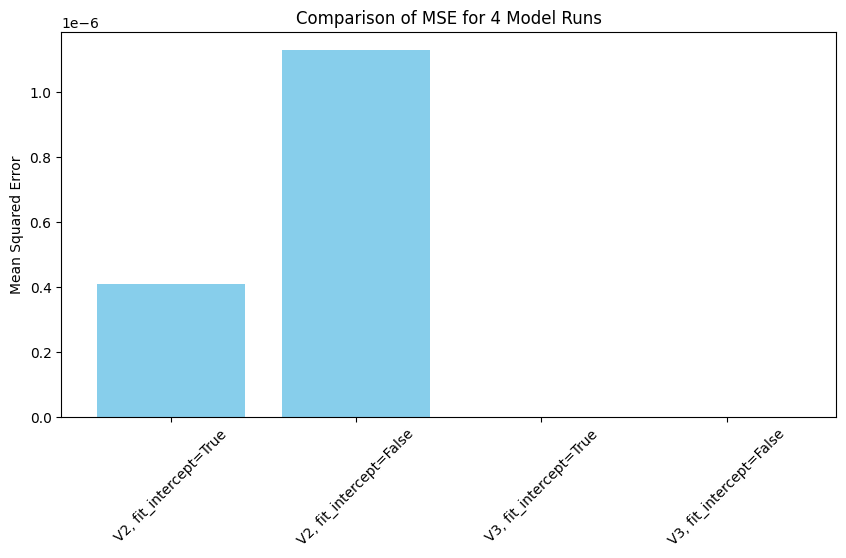

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


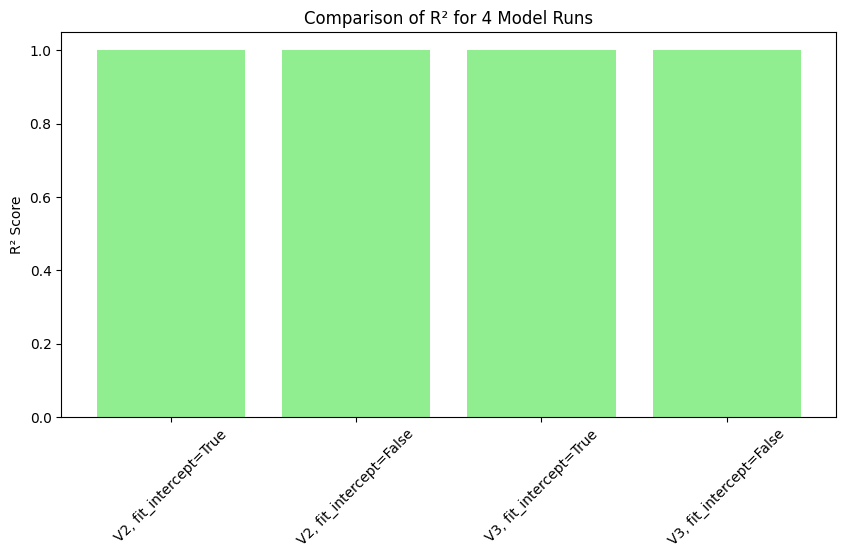

In [33]:
import matplotlib.pyplot as plt
import pandas as pd

metrics = pd.DataFrame({
    'Model': ['V2, fit_intercept=True', 'V2, fit_intercept=False',
              'V3, fit_intercept=True', 'V3, fit_intercept=False'],
    'MSE': [
        mean_squared_error(y_test_v2, y_pred_v2_1),
        mean_squared_error(y_test_v2, y_pred_v2_2),
        mean_squared_error(y_test_v3, y_pred_v3_1),
        mean_squared_error(y_test_v3, y_pred_v3_2)
    ],
    'R2': [
        r2_score(y_test_v2, y_pred_v2_1),
        r2_score(y_test_v2, y_pred_v2_2),
        r2_score(y_test_v3, y_pred_v3_1),
        r2_score(y_test_v3, y_pred_v3_2)
    ]
})

# Plot MSE
plt.figure(figsize=(10,5))
plt.bar(metrics['Model'], metrics['MSE'], color='skyblue')
plt.title('Comparison of MSE for 4 Model Runs')
plt.ylabel('Mean Squared Error')
plt.xticks(rotation=45)
plt.show()

# Plot R²
plt.figure(figsize=(10,5))
plt.bar(metrics['Model'], metrics['R2'], color='lightgreen')
plt.title('Comparison of R² for 4 Model Runs')
plt.ylabel('R² Score')
plt.xticks(rotation=45)
plt.show()